<a href="https://colab.research.google.com/github/chemtrailsx/basic-ML-projects/blob/main/multiple_linear_regression_project_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!wget https://raw.githubusercontent.com/sparefordata/data-for-multiple-linear-regression-via-kaggle/main/Student_Performance.csv
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('Student_Performance.csv')
print(df.head())

--2024-11-10 17:09:53--  https://raw.githubusercontent.com/sparefordata/data-for-multiple-linear-regression-via-kaggle/main/Student_Performance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175071 (171K) [text/plain]
Saving to: ‘Student_Performance.csv.2’

Student_Performance 100%[===================>] 170.97K  --.-KB/s    in 0.02s   

2024-11-10 17:09:53 (6.71 MB/s) - ‘Student_Performance.csv.2’ saved [175071/175071]

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
print(df.isnull().sum())

# Get data types of each column
print(df.dtypes)

# Generate descriptive statistics
print(df.describe())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000    

In [7]:
df.dropna()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


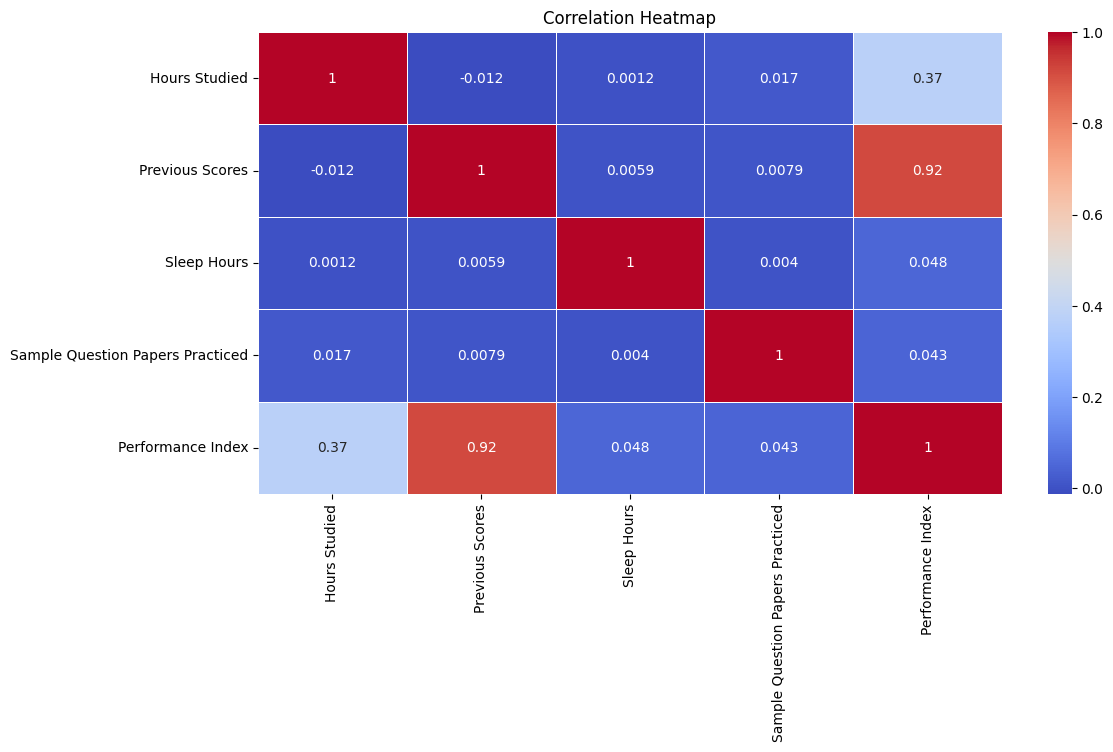

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# prompt: show me columns with low correlation

# Identify columns with low correlation (e.g., absolute correlation < 0.1)
threshold = 0.1
correlation_matrix = numeric_df.corr()
low_correlation_cols = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) < threshold:
            low_correlation_cols.append((col1, col2, correlation))

# Print or further process the pairs of columns with low correlation
print("Column pairs with low correlation (below", threshold, "):")
for col1, col2, correlation in low_correlation_cols:
    print(f"{col1} and {col2}: {correlation}")

Column pairs with low correlation (below 0.1 ):
Hours Studied and Previous Scores: -0.012389915515782873
Hours Studied and Sleep Hours: 0.0012451983990223517
Hours Studied and Sample Question Papers Practiced: 0.017463167776963075
Previous Scores and Sleep Hours: 0.005944219446099601
Previous Scores and Sample Question Papers Practiced: 0.007888025233099645
Sleep Hours and Sample Question Papers Practiced: 0.00399022021777753
Sleep Hours and Performance Index: 0.04810583543435246
Sample Question Papers Practiced and Performance Index: 0.04326832665907999


In [9]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = data['Performance Index']

In [12]:
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Extracurricular Activities'])
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 4.082628398521859
R-squared Score: 0.9889832909573145


In [21]:
from sklearn.metrics import mean_absolute_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.6111213463123049


In [22]:
#final values:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 4.082628398521859
R-squared Score: 0.9889832909573145
Mean Absolute Error: 1.6111213463123049


R-squared (R²): Indicates the proportion of variance in the dependent variable that can be explained by the independent variables. A higher R² value means a better fit.

Mean Absolute Error (MAE): Average magnitude of errors between predicted and actual values.

Mean Squared Error (MSE): Average of the squared differences between predicted and actual values.

Root Mean Squared Error (RMSE): Square root of MSE, giving an idea of how far the model's predictions are from the actual values.


In [30]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Display
print("Predicted values:")
print(y_pred)

# Compare
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of actual vs predicted values:")
print(comparison_df.head())


Predicted values:
[54.71185392 22.61551294 47.90314471 ... 16.79341955 63.34327368
 45.94262301]

Comparison of actual vs predicted values:
      Actual  Predicted
6252    51.0  54.711854
4684    20.0  22.615513
1731    46.0  47.903145
4742    28.0  31.289767
4521    41.0  43.004570


In [31]:
import numpy as np

def adjusted_r2(r2, n, k):
  return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# n (number of observations) and k (number of predictors)
n = len(y_test)  # Replace with the actual number of observations
k = X_train.shape[1] # Number of features

adjusted_r2_val = adjusted_r2(r2, n, k)
print("Adjusted R-squared:", adjusted_r2_val)

Adjusted R-squared: 0.9889501247484555
